# Star Wars Survey

In this project, we'll be analyzing data on the Star Wars movies. 

While waiting for [Star Wars: The Force Awakens](https://en.wikipedia.org/wiki/Star_Wars:_The_Force_Awakens) to come out, the team at [FiveThirtyEight](http://fivethirtyeight.com/) became interested in answering some questions about Star Wars fans. In particular, they wondered: **does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?**

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, which you download from [their GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

For this project, you'll be cleaning and exploring the data set in Jupyter notebook. To see a sample notebook containing all of the answers, visit the project's GitHub repository.

The data has several columns, including:

* `RespondentID` - An anonymized ID for the respondent (person taking the survey)
* `Gender` - The respondent's gender
* `Age` - The respondent's age
* `Household Income` - The respondent's income
* `Education` - The respondent's education level
* `Location` (Census Region) - The respondent's location
* `Have you seen any of the 6 films in the Star Wars franchise?` - Has a `Yes` or `No` response
* `Do you consider yourself to be a fan of the Star Wars film franchise?` - Has a Yes or No response

For some questions, the respondent had to check one or more boxes. This type of data is difficult to represent in columnar format. As a result, this data set needs a lot of cleaning.

First, we'll need to remove the invalid rows. For example, `RespondentID` is supposed to be a unique ID for each respondent, but it's blank in some rows. We'll need to remove any rows with an invalid `RespondentID`.

In [1]:
import pandas as pd
import numpy as np
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
star_wars.head(3)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central


In [2]:
star_wars = star_wars[pd.notnull(star_wars["RespondentID"])]
print(star_wars.shape)
star_wars.columns

(1186, 38)


Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

Next, we should take a look at the next two columns, which are:

* Have you seen any of the 6 films in the Star Wars franchise?
* Do you consider yourself to be a fan of the Star Wars film franchise?

Both represent Yes/No questions. They can also be `NaN` where a respondent chooses not to answer a question.

Both columns are currently string types, because the main values they contain are `Yes` and `No`. We can make the data a bit easier to analyze down the road by converting each column to a Boolean having only the values `True`, `False`, and `NaN`. Booleans are easier to work with because we can select the rows that are `True` or `False` without having to do a string comparison.

We can use the `pandas.Series.map()` method on series objects to perform the conversion.

In [3]:
yes_no = {"Yes": True, "No": False}

for col in [
    "Have you seen any of the 6 films in the Star Wars franchise?",
    "Do you consider yourself to be a fan of the Star Wars film franchise?"
    ]:
    star_wars[col] = star_wars[col].map(yes_no)

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


The next six columns represent a single checkbox question. The respondent checked off a series of boxes in response to the question, `Which of the following Star Wars films have you seen? Please select all that apply.`

The columns for this question are:

* `Which of the following Star Wars films have you seen? Please select all that apply.` - Whether or not the respondent saw `Star Wars: Episode I The Phantom Menace`.
* `Unnamed: 4` - Whether or not the respondent saw `Star Wars: Episode II Attack of the Clones`.
* `Unnamed: 5` - Whether or not the respondent saw `Star Wars: Episode III Revenge of the Sith`.
* `Unnamed: 6` - Whether or not the respondent saw `Star Wars: Episode IV A New Hope`.
* `Unnamed: 7` - Whether or not the respondent saw `Star Wars: Episode V The Empire Strikes Back`.
* `Unnamed: 8` - Whether or not the respondent saw `Star Wars: Episode VI Return of the Jedi`.

For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is `NaN`, the respondent either didn't answer or didn't see the movie. We'll assume that they didn't see the movie.

We'll need to convert each of these columns to a Boolean, then rename the column something more intuitive. We can convert the values the same way we did earlier, except that we'll need to include the movie title and NaN in the mapping dictionary.

In [4]:
true_false = {
    "Star Wars: Episode I  The Phantom Menace": True,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True,
    np.nan: False,
}
for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(true_false)
    
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Renaming columns

In [5]:
star_wars = star_wars.rename(columns={
        "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
        "Unnamed: 4": "seen_2",
        "Unnamed: 5": "seen_3",
        "Unnamed: 6": "seen_4",
        "Unnamed: 7": "seen_5",
        "Unnamed: 8": "seen_6"
        })

star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦',
       'Do 

The next six columns ask the respondent to rank the Star Wars movies in order of least favorite to most favorite. `1` means the film was the most favorite, and `6` means it was the least favorite. Each of the following columns can contain the value `1`, `2`, `3`, `4`, `5`, `6`, or `NaN`:

* `Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.` - How much the respondent liked `Star Wars: Episode I The Phantom Menace`
* `Unnamed: 10` - How much the respondent liked `Star Wars: Episode II Attack of the Clones`
* `Unnamed: 11` - How much the respondent liked `Star Wars: Episode III Revenge of the Sith`
* `Unnamed: 12` - How much the respondent liked `Star Wars: Episode IV A New Hope`
* `Unnamed: 13` - How much the respondent liked `Star Wars: Episode V The Empire Strikes Back`
* `Unnamed: 14` - How much the respondent liked `Star Wars: Episode VI Return of the Jedi`

Fortunately, these columns don't require a lot of cleanup. We'll need to convert each column to a numeric type, though, then rename the columns so that we can tell what they represent more easily.

In [6]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

star_wars = star_wars.rename(columns={
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': "ranking_1",
    "Unnamed: 10": "ranking_2",
    "Unnamed: 11": "ranking_3",
    "Unnamed: 12": "ranking_4",
    "Unnamed: 13": "ranking_5",
    "Unnamed: 14": "ranking_6",
    })

star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6', 'ranking_1',
       'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦',
       'Do you consider yourself to be a fan of the Star Trek franchise?',
       'Gender', 'Age', 'Household Income', 'Education',
       'Location (Census Region)'],

Now that we've cleaned up the ranking columns, we can find the highest-ranked movie more quickly.

In [7]:
# Set color palette
# http://tools.medialab.sciences-po.fr/iwanthue/

def hex_to_rgb(hex):
    hex = hex.lstrip('#')
    hlen = len(hex)
    return [int(hex[i:i+hlen//3], 16) for i in range(0, hlen, hlen//3)]

def normalize_primary(hex: str)-> tuple:
    return tuple(map(lambda x: x/255, hex_to_rgb(hex)))
    
def normalize_subdued(hex: str,a: float)-> tuple:
    c = hex_to_rgb(hex)
    return (c[0]/255,c[1]/255,c[2]/255,a)
                 
def gen_primary(colors: dict)-> dict:
    return {name+'_p':normalize_primary(rgb) for name, rgb in colors.items()}

def gen_subdued(colors: dict, alpha: float = 0.25)-> dict:
    return {name+'_s':normalize_subdued(rgb, alpha) for name, rgb in colors.items()}

pantone = { 
    '107c': "#FBE122",
    '274c': '#211551',
    '219c': '#DA1884',
    '2174c': '#0076CE'
}
                 
def normalize_colors(colors: dict, alpha: float = 0.25)-> dict:
    np = gen_primary(colors)
    ns = gen_subdued(colors, alpha)
    np.update(ns)
    return np

cpA = normalize_colors(pantone)

def get_color_list(
    n: int,
    hl_pos: [int],
    hl_c: str = 'slategrey',
    sd_c: str = 'lightgrey'
    )-> [str]:
    highlight_color = hl_c
    subdued_color   = sd_c
    cl = []
    for i in range(0,n):
        if i in hl_pos:
            cl.append(highlight_color)
        else:
            cl.append(subdued_color)
    return cl

## Plotting Average Ranking

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patheffects as PathEffects
sns.set(style='white')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 5.5})
%matplotlib inline

def annotate(df: pd.DataFrame,
            color,
            lbl_format,
            label_horspace = -0.25,
            label_vertspace = 0.1):
    for i, label in enumerate(df):
        plt.text(i + label_horspace,
                 label + label_vertspace,
                 lbl_format.format(label),
                 fontsize=16,
                 color=color[i])
        
def plot_bar_and_annotate(w, h, df, lbl_format, plt_title, highlight:[int], color1=cpA['107c_p'], color2=cpA['274c_p'], label_horspace=-0.25, label_vertspace=0.1):
    fig, ax = plt.subplots(figsize=(8, 3))
    bar_color = get_color_list(6, highlight, color1)
    label_color = get_color_list(6, highlight, color2)
    df.plot.bar(ax=ax,
        xlim=(0,625),
        width=0.6,
        linewidth=0,
        fontsize=12,
        color = bar_color)
    annotate(df,label_color,lbl_format,label_horspace,label_vertspace)
    eps=['I','II','III','IV','V','VI']
    plt.xticks(np.arange(6), eps, color=color2,fontsize='30', rotation=0)
    fig.text(0.08, 1.1, plt_title, fontsize=24, fontweight='black', color=color2)
    sns.despine(ax=ax,left=True, bottom=True, top=True, right=True)
    ax.tick_params(top="off", right="off", left="off", bottom="off", labelleft=False)

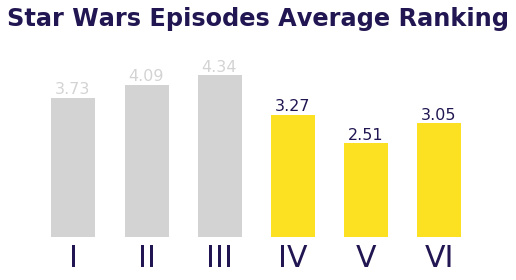

In [9]:
means = star_wars[star_wars.columns[9:15]].mean()
plot_bar_and_annotate(8, 3, means, '{:.2f}', 'Star Wars Episodes Average Ranking', [3,4,5])

# plot_bar_and_annotate_two(8, 3, means, '{:.2f}', 'Star Wars Episodes Average Ranking', 
#                           [[3,4,5]], bar_colors=['107c'], label_colors=['274c'])

Column 10 contains the following string: 'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.'

So columns with lower ranking values are considered better by the survey respondants. From the chart, it looks like the older movies(#4-6) have higher rankngs than the newer star war movies(#1-3).

## Plotting Total Respondant

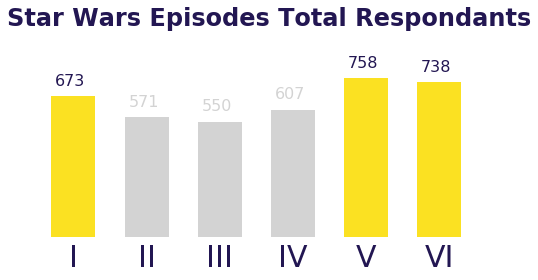

In [10]:
sums = star_wars[star_wars.columns[3:9]].sum()
plot_bar_and_annotate(8, 3, sums, '{:d}', 'Star Wars Episodes Total Respondants', [0,4,5], label_horspace = -0.25, label_vertspace = 50)

Same thing here, more respondants saw the original movies(#4-6), although a little bit more respondant watched the episode I more than episode IV, and they were ranked higher. Keep in a mind a lower value for average ranking means the respondant liked the movie more.

Let's do the same analysis again, but seperate the plots by gender.

## Plotting Average Ranking based on Gender

Let's update our function to be able to plot male and female data side-by-side!

In [11]:
def plot_bar_two(w, h, df, lbl_format, plt_title, highlight,
                              bar_colors,
                              label_colors,
                              label_horspace=-0.25, 
                              label_vertspace=0.1):
    fig, ax = plt.subplots(figsize=(w, h))
    num_rows = len(df.index)
    bar_color, label_color = [], []
    for pos, item in enumerate(bar_colors):
        bar_color.append(get_color_list(num_rows, highlight[pos], cpA[bar_colors[pos]+'_p']))
        label_color.append(get_color_list(num_rows, highlight[pos], cpA[label_colors[pos]+'_p']))

    df.plot.bar(ax=ax, xlim=(0,625), width=0.8, linewidth=0, fontsize=12, color = bar_color)
    
    eps=['I','II','III','IV','V','VI']
    plt.xticks(np.arange(6), eps, color=cpA['274c_p'],fontsize='30', rotation=0)
    fig.text(0.15, 1.1, plt_title, fontsize=24, fontweight='black', color=cpA['274c_p'])
    sns.despine(ax=ax,left=True, bottom=True, top=True, right=True)
    ax.tick_params(top="off", right="off", left="off", bottom="off", labelleft=False)
    ax.get_legend().remove()

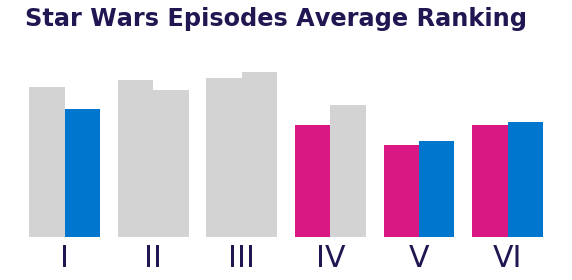

In [12]:
title_prefix='Star Wars Episodes Average Ranking'
fem='$\u2640$'
mal='$\u2642$'

def get_index(df, col, n=1, min=True):
    return df[col].sort_values(ascending=min)[:n]

sw_males = star_wars[star_wars["Gender"] == "Male"]
sw_females = star_wars[star_wars["Gender"] == "Female"]

means_males = sw_males[sw_males.columns[9:15]].mean().rename('mean_males')
means_females = sw_females[sw_females.columns[9:15]].mean().rename('mean_females')

means_m_f = pd.concat([means_males, means_females], axis=1).reset_index(drop=True)
# print(means_m_f)
highl_male = get_index(means_m_f, 'mean_males', 3)
highl_female = get_index(means_m_f, 'mean_females', 3)

plot_bar_two(10, 3, means_m_f, '{:.2f}', title_prefix, [highl_male, highl_female], 
                          bar_colors=['219c','2174c'], label_colors=['219c','2174c'])

## Plotting Total Respondents based on Gender

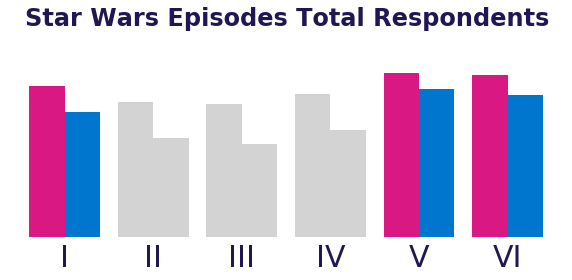

In [13]:
title_prefix='Star Wars Episodes Total Respondents'

sum_males = sw_males[sw_males.columns[3:9]].sum().rename('sum_males')
sum_females = sw_females[sw_females.columns[3:9]].sum().rename('sum_females')

sum_m_f = pd.concat([sum_males, sum_females], axis=1).reset_index(drop=True)
# print(sum_m_f)

highl_male = get_index(sum_m_f, 'sum_males', 3, min=False)
highl_female = get_index(sum_m_f, 'sum_females', 3, min=False)

plot_bar_two(10, 3, sum_m_f, '{:.2f}', title_prefix, [highl_male, highl_female], 
                          bar_colors=['219c','2174c'], label_colors=['219c','2174c'])

# Conclusion

In this project, we have explored the star wars survey dataset, we cleaned up the data, and analyzed the ranking and total respondents.We visualized the data, and analyzed both aspects in general and distinguished based on gender.

From the last two bar charts, we have concluded that:
- In general, both males and females loved episode I, V, and VI.
- Interestingly, more males watches episodes 1-3, but males liked them far less than females did.